In [53]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Self Projects/Password Strength Checker

/content/drive/MyDrive/Self Projects/Password Strength Checker


In [4]:
df = pd.read_csv("processed_pass_strength.csv", on_bad_lines="skip")
df.head()

,Unnamed: 0,Length,Characters,Digits,Symbols,strength
0,0,8,4,4,0,1
1,1,8,4,4,0,1
2,2,9,7,2,0,1
3,3,8,5,3,0,1
4,4,11,10,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  669640 non-null  int64
 1   Length      669640 non-null  int64
 2   Characters  669640 non-null  int64
 3   Digits      669640 non-null  int64
 4   Symbols     669640 non-null  int64
 5   strength    669640 non-null  int64
dtypes: int64(6)
memory usage: 30.7 MB


In [6]:
df["strength"].value_counts()

strength
1    496801
0     89702
2     83137
Name: count, dtype: int64

**0 : Weak**<br>
**1 : Medium**<br>
**2 : Strong**

In [7]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Length,Characters,Digits,Symbols,strength
0,8,4,4,0,1
1,8,4,4,0,1
2,9,7,2,0,1
3,8,5,3,0,1
4,11,10,1,0,1


<Axes: >

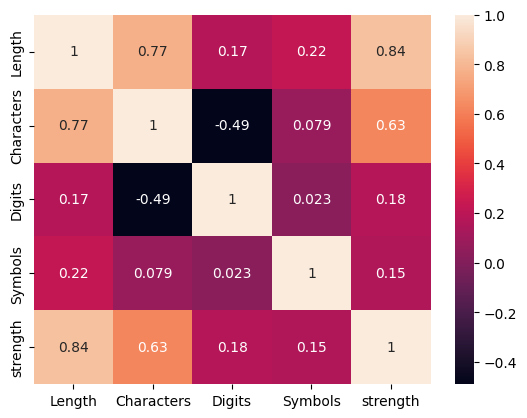

In [8]:
sns.heatmap(df.corr(), annot=True)

* As we know length positively correlates to strength

## **Lets check the mean values of each column group by strength column**

In [9]:
df_grouped = df.groupby("strength").mean()
df_grouped.head()

,Length,Characters,Digits,Symbols
strength,,,,
0,6.549631,4.752179,1.774799,0.022552
1,9.618964,6.150571,3.449627,0.018766
2,15.932497,12.596052,3.100581,0.235864


<Axes: xlabel='strength', ylabel='count'>

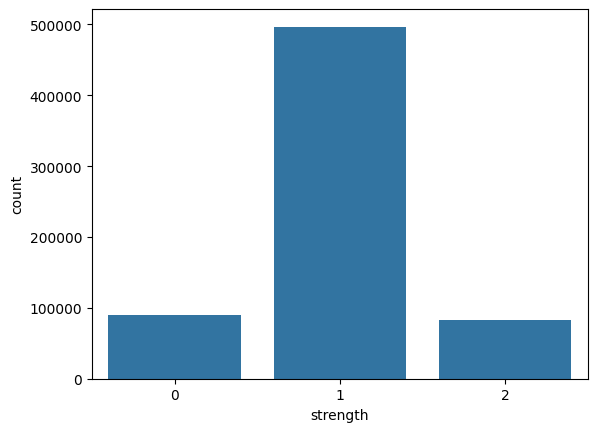

In [10]:
sns.countplot(x="strength", data=df)

The 'weak' and 'strong' has the balance in data. But 'Medium' has a large difference.

In [11]:
df_medium = df.loc[df["strength"]==1]
print("Length of Medium strength password is", len(df_medium))

Length of Medium strength password is 496801


Lets balance the amount to 100K

In [18]:
df_med_100K = df_medium[:100000]
print("The length of df_med_100K is", len(df_med_100K))

The length of df_med_100K is 100000


In [29]:
df_without_med = df.loc[df["strength"]!=1]
df_without_med.head()

,Length,Characters,Digits,Symbols,strength
5,16,14,2,0,2
13,16,13,3,0,2
20,19,15,2,2,2
21,6,5,1,0,0
22,16,14,1,1,2


In [31]:
df_new = pd.concat([df_without_med, df_med_100K], axis=0, ignore_index=True)
df_new.head()

,Length,Characters,Digits,Symbols,strength
0,16,14,2,0,2
1,16,13,3,0,2
2,19,15,2,2,2
3,6,5,1,0,0
4,16,14,1,1,2


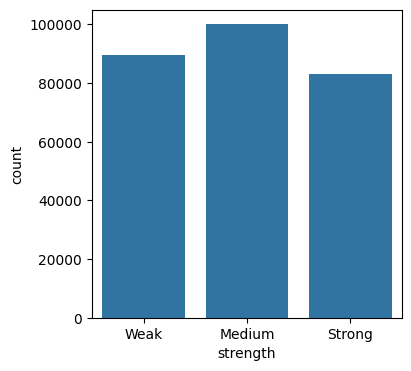

In [41]:
plt.figure(figsize=(4, 4))
sns.countplot(x="strength", data=df_new)
plt.xticks([0,1,2], ["Weak", "Medium", "Strong"])
plt.show()

# **Train Test Split**

In [52]:
x = df_new.iloc[:, :4] # [rows, columns] not giving any value in the row side, because we need full rows
y = df_new.strength

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    random_state=2)

print("The size of train dataset is :", x_train.shape, y_train.shape)
print("The size of test dataset is :", x_test.shape, y_test.shape)

The size of train dataset is : (245555, 4) (245555,)
The size of test dataset is : (27284, 4) (27284,)


# **Model**

In [68]:
model = Sequential()

model.add(Dense(1000, activation="relu", input_shape=(4,)))
model.add(Dense(250, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              5000      
                                                                 
 dense_22 (Dense)            (None, 250)               250250    
                                                                 
 dense_23 (Dense)            (None, 3)                 753       
                                                                 
Total params: 256003 (1000.01 KB)
Trainable params: 256003 (1000.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# TRAIN THE MODEL
model.fit(x_train, y_train)

7674/7674 [==============================] - 59s 8ms/step - loss: 0.0395 - accuracy: 0.9854


In [70]:
model.evaluate(x_test, y_test)

853/853 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 1.0000


[0.0012670756550505757, 0.9999633431434631]

In [73]:
%pwd

'/content/drive/MyDrive/Self Projects/Password Strength Checker'

In [76]:
# LETS SAVE THE MODEL TO THE CURRENT DIRECTORY
model.save("Pass-strength-Predictor")
print("Model saved successfully.")

Model saved successfully.
